# Computer Homework 3: The Method of Relaxation
 or, How I learned to relax and love electrostatics!


## Introduction

In class we learned that 
\begin{equation}
\vec E = - \vec \nabla V, ~~~~~~~~ ~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (1) }
\end{equation}
where $\vec \nabla = \left(\frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z}\right)$,
 and 
 \begin{equation}
\vec E = \int \frac {\rho d\tau} {4 \pi \epsilon_0}\frac {\hat r} {r^2}.~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (2) }
\end{equation}
Here $d\tau$ is the differential volume element to avoid confusion with $V$ which is the potential.

Let's concentrate on equation (2) first.   It is an integral equation.   From calculus we know that the inverse of integration is taking a derivative.  You might be concerned that this equation has vectors in it.  Don't be.  It is still true that we can differentiate both sides to get rid of the integration.   The only technical point is what type of derivative to use.   Trust me for now that the right answer is the divergence (if you don't know what a divergence is, just pretend I said derivative and read on).  Taking the divergence of both sides of Equation (2), we arrive at the differential form of Gauss' law:

\begin{equation}
\vec \nabla \cdot \vec E = \frac \rho {\epsilon_0}. ~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (3) }
\end{equation}
If we now substitute Equation (1) into this equation we get: 
\begin{equation}
\nabla^2 V= \frac {- \rho} {\epsilon_0}.~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (4) }
\end{equation}
This looks fairly simple, but we can make it even easier if we restrict ourselves to the case where we are considering the potential in regions where there are absolutely no charges (e.g., $\rho = 0$).  Then we have:
\begin{equation}
\nabla^2 V= 0.  ~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (5) }
\end{equation}
In case you have never seen this before, you should know that $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$.  Equation 5 is just saying that the second derivative of the potential $V$ is zero.  If this were one dimensional then this would mean that the potential can have slopes and nothing more complicated that that.  The generalization of this statement to 2 and 3 dimensions will lend itself to a very easy numerical method for solving for the potential.  We'll come back to this in the next section.  

Let's take a moment and review where we stand.   The ingredients we used to find Equation 5 equation (a) Coulomb's law, (b) the definition of the potential, and (c) making the choice that we will only consider regions that are charge free.  Assuming our problem satisfies condition (c) then Equation 5 completely specifies the electric field and is equivalent to solving Coulomb's law.  Of course you need Equation (1) to recover the field.   You might think that (c) is a big restriction, but it isn't.  You just carefully cut out the regions that have charges, figure out the potential on the boundary of the regions you had to remove and then plug ahead with (5).   



## The Method of Relaxation

In two dimensions Equation (5) reduces to:
\begin{equation}
\frac{\partial^2V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2}  = 0.~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (6) }
\end{equation}
 Consider the one dimensional example of a function with no second derivative (e.g., a straight line with a slope).   It is obvious that the value of a sloped line at a point is the average of the value at points an equal distance to the right and left of that point.  In two and three dimensions things are only slightly more complicated.  One can show (using Taylor's Theorem) that the potential at any point is just the average of the potential on a sphere (or in two dimensions, a circle) surrounding that point.  We could also show that the average in the $x$ and $y$ directions is close enough to a circle for this method to converge.  If you are interested in the full derivation I can provide a reference.

The fact that the potential is the average on a circle suggests an iterative numerical method for solving for the potential in 2 dimensions.  Here are the steps:

Step 1:  Divide the space into a two dimensional grid with a uniform grid spacing $\delta$.

Step 2: Initialize the potential at the edges (or any central removed regions) of the grid to match the boundary conditions specified in the problem.

Step 3: Replace the potential within each cell inside the grid with the average of the potential in the cells above, below, left and right of it. <i>Exception:</i> Do not update cells that enforce the boundary conditions!

\begin{equation}
V(x,y) = \frac 1 4 \left[ V(x+\delta,y) + V(x-\delta,y) + V(x,y+\delta) + V(x,y-\delta)\right]~~~~~~~~ ~~~~~~~~ ~~~~~~~~ \mbox{  (7) }
\end{equation}

Step 4: Repeat steps 2 and 3 enough times for the results to converge.  Use the new grid as input for step 3 each time you repeat.

We will build a code to carry out this procedure in this excercise.



## Import the usual libraries

In [1]:
import numpy as np                         # numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            # this is the library we use to plot
## The next line causes matplot lib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline    
from mpl_toolkits.mplot3d import Axes3D   ## this is a special library to plot in 3d we are using today

import matplotlib.cm as cm                # allows us to choose a variety of colormaps

## A few useful Computational Tricks

In this assignment you will need to numerically evaluate Equation (7) and you will need to take numerical derivatives.   The derivative is defined as $$\frac {df}{dx} = \lim_{\epsilon \to 0} \frac {f(x+\epsilon) - f(x)}{\epsilon}.$$  To evaulate this numerically we make $\epsilon$ small but finite.  For example if we are calculating a function on a grid of spacing $\delta$  we can approximate the derivative as $$\frac {df}{dx} \approx \frac {f(x+\delta) - f(x)}{\delta}$$  However, we can do a better job by making the derivative symmetric about the point at which we are calculating it:
$$\frac {df}{dx} \approx \frac {f(x+\delta) - f(x - \delta)}{2 \delta}$$ 
To calculate derivatives or to evaluate equation (7) we need to be able to select the elements of our grid that are to the right, left, above, or below a given element.   Array operations give us an easy way to do this.

### using ```np.roll()``` to shift elements in an array.

The documentation for ```np.roll()``` can be found <a href='http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.roll.html'>here. </a>  This function shifts elements in an array by a specified number of positions.   The following examples illustrate how this works.  Later you will implement equation (7) and a numerical gradient using this function.

In [2]:
print("a 1 dimensional example:")
test_array = np.arange(10)
print("the test array:      ",test_array)
print("shifting right by 1: ", np.roll(test_array,1))
print("shifting left by 1:  ",np.roll(test_array,-1))
print("one dimensional derivative: ",  (np.roll(test_array,-1) - np.roll(test_array,1))/2)

a 1 dimensional example:
the test array:       [0 1 2 3 4 5 6 7 8 9]
shifting right by 1:  [9 0 1 2 3 4 5 6 7 8]
shifting left by 1:   [1 2 3 4 5 6 7 8 9 0]
one dimensional derivative:  [-4.  1.  1.  1.  1.  1.  1.  1.  1. -4.]


You can see that this function wraps around at the edges so the results at the edges of the array may be wrong and need to be treated carefully or ignored. You will implement a gradient operator in 2d as part of this exercise.  This requires us to generalize the above to two dimensional arrays.  The following examples show how ```roll()``` works with two dimensional arrays.

In [3]:
print("a 2 dimensional example:")
test_array2 = np.arange(16)
test_array2 = np.reshape(test_array2, (4,4))
print("2d test array: ")
print(test_array2)
print("shift the x-axis right:")
print(np.roll(test_array2,1,axis = 1))
print("shift the x-axis left:")
print(np.roll(test_array2,-1,axis = 1))
print("shift the y-axis down:")
print(np.roll(test_array2,1,axis = 0))
print("shift the y-axis up:")
print(np.roll(test_array2,-1,axis = 0))

a 2 dimensional example:
2d test array: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
shift the x-axis right:
[[ 3  0  1  2]
 [ 7  4  5  6]
 [11  8  9 10]
 [15 12 13 14]]
shift the x-axis left:
[[ 1  2  3  0]
 [ 5  6  7  4]
 [ 9 10 11  8]
 [13 14 15 12]]
shift the y-axis down:
[[12 13 14 15]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
shift the y-axis up:
[[ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [ 0  1  2  3]]


We will analyze situations where the potential is fixed to a known value at certain locations (for example on a conductor). These constraints are called <b> boundary conditions</b>. We will want to initialize arrays with these boundary conditions.  To do this we need to put elements into the array using array indexing.  The following example shows you how to do this:

In [4]:
array = np.zeros([5,5])
print("array")
print(array)
print("set the left column to 1")
array[:,0] = 1
print(array)
print("set the right column to 5")
# This shows a useful feature of arrays: you can index the last row or column with the index -1.
array[:,-1] = 5
print(array)
print("you can figure out how to do the top and bottom rows... try it here.")

array
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
set the left column to 1
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
set the right column to 5
[[1. 0. 0. 0. 5.]
 [1. 0. 0. 0. 5.]
 [1. 0. 0. 0. 5.]
 [1. 0. 0. 0. 5.]
 [1. 0. 0. 0. 5.]]
you can figure out how to do the top and bottom rows... try it here.


### Visualizing 2d scalar functions
In this example you will visualize a function $z=f(x,y)$. There are several nice ways to do this, including contour plots and surface plots.

First let's generate some data to plot. In your assignment, you'll replace this made-up data with your computed values of $V$.

In [5]:
# 
x, y = np.meshgrid(np.linspace(-2,2,50), np.linspace(-2,2,50)) # generate a grid of points.
z = np.sin((x**2 + y**2)*np.exp(-(x**2 + y**2)))     # here is a cool function to plot.


### Here's an example of a surface plot

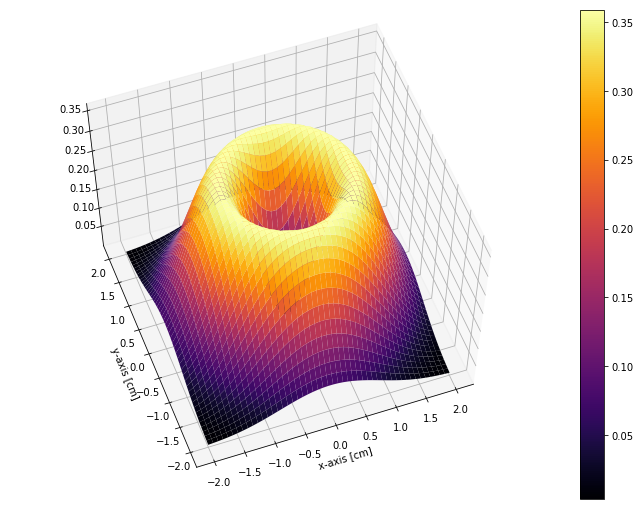

In [6]:
from mpl_toolkits.mplot3d import Axes3D   # allows plotting in 3D

fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,z, cmap=cm.inferno)
cbar = fig.colorbar(surf)
ax.set_ylabel('y-axis [cm]')
ax.set_xlabel('x-axis [cm]')
ax.view_init(60, -110)  # elevation, azimuth angles. You can play around with these.


### Here are two kinds of contour plots:

Text(0.5,0,'x-axis [cm]')

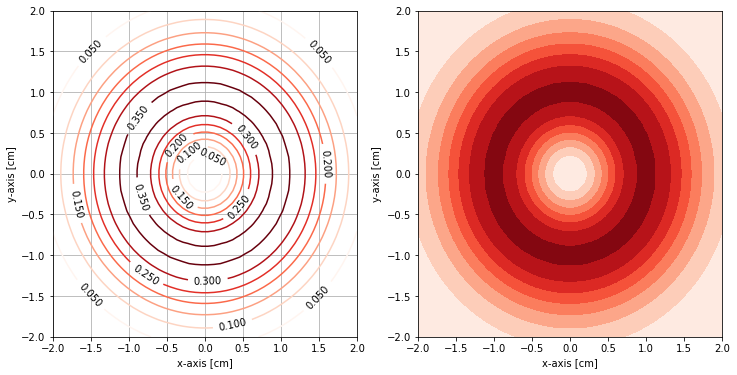

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
contour1 = ax1.contour(x,y,z, cmap=cm.Reds)    # This gives an unfilled plot
ax1.clabel(contour1, fontsize=10, colors='black')  # label the contours
ax1.grid()
ax1.set_ylabel('y-axis [cm]')
ax1.set_xlabel('x-axis [cm]')

contour2 = ax2.contourf(x,y,z, cmap=cm.Reds)   # this gives a filled plot
#ax2.clabel(contour2, fontsize=10, colors='black')  # label the contours (doesn't look nice)
ax2.set_ylabel('y-axis [cm]')
ax2.set_xlabel('x-axis [cm]')

### Finally, we can also use ```imshow()``` to display a continuous range of colors.

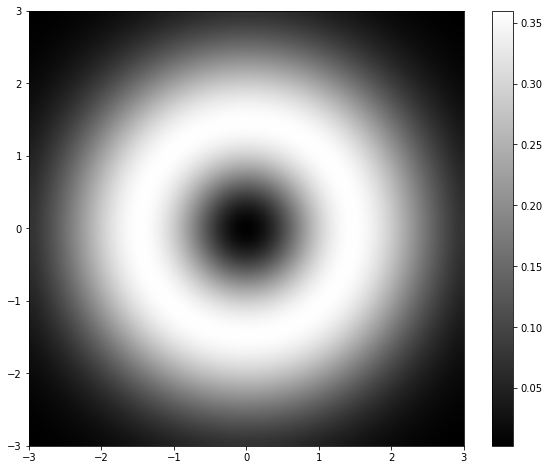

In [8]:
fig, ax = plt.subplots(1, figsize=(10,8))
img = ax.imshow(z, origin='lower', interpolation='bicubic', cmap=cm.gray, 
                extent=[-3,3,-3,3])  # coordinate order is left, right, bottom, top     
cbar = fig.colorbar(img)

## Your assignment (due Friday, Jan. 31)

Consider the 7 cm tall, 10 cm wide rectangle illustrated in the following figure.  The text notes on the plot show the potential at each of the four walls.  Use the method of relaxation to solve for the field in this region.

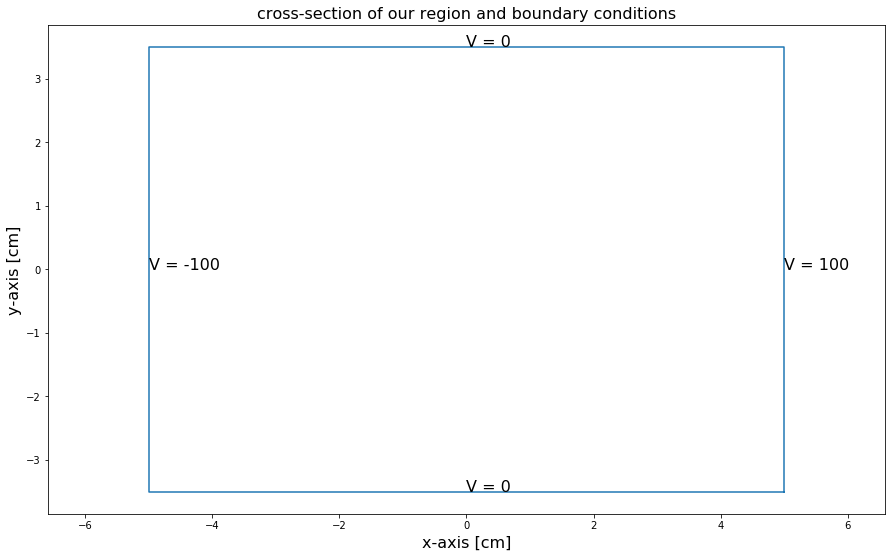

In [9]:
plt.figure(figsize=(15,9))
plt.plot(np.array([5,5,-5,-5,5]),np.array([-3.5,3.5,3.5,-3.5,-3.5]))
plt.axis('equal')
plt.xlabel("x-axis [cm]", fontsize=16)
plt.ylabel("y-axis [cm]", fontsize=16)
plt.title("cross-section of our region and boundary conditions", fontsize=16)
plt.annotate("V = 0",(0,3.5), fontsize=16)
plt.annotate("V = 0",(0,-3.5), fontsize=16)
plt.annotate("V = 100",(5,0), fontsize=16)
plt.annotate("V = -100",(-5,0), fontsize=16)
plt.show()

### Part 1 (5 pts): Set up a grid to describe the region within this rectangle, including appropriate values on the boundaries.

In [ ]:
# Your code goes here

### Part 2 (25 pts): Use Equation 7 and the ```roll()``` command to write code that carries out the method of relaxation calculation and finds V everywhere in the rectangle.

Full credit for: 

(1) Demonstrating that the boundary conditions are correctly enforced and the potential on the boundaries doesn't change as you iterate. (e.g., plot the potential of a point on each boundary as a function of the iteration number to confirm that it remains the same.) 

(2) Making plots that demonstrate you have run enough iterations to converge. (e.g., plot the value of a few interior pixels as a function of the iteration number and make sure the answer has stabilized). 

(3) Making a nice plot of the final potential with correct labels.

In [ ]:
# Your code goes here

Double click to write your comments explaining your results.  Make sure to explain why your convergence checks are sufficient.

### Part 3 (10 pts): Write code to calculate the electric field.

Use this code and Equation 1 to calculate the electric field from the potential you found in 2.  Plot the electrostatic field over a contour plot of the potential so both are visible on the same plot.

HINT: To calculate $E$ from $V$, you must calculate the vector of partial derivatives of $V$. For example, to compute $E_x = -\partial V/\partial x$, you would take a first derivative using only the $x$-components of $V$:

```
Ex = - (np.roll(V,-1,axis = 1) - np.roll(V,1,axis = 1))/2

```
Full credit for:
* Correct calculation of E
* Nice plot of V and E together
* Verifying that your lines of E point in the correct direction.

In [ ]:
# Your code goes here

Explain your results and be sure to note whether the field points in the right direction.

double click to write your discussion here.